In [454]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [455]:
class Kampus:
    def __init__(self,nama_kampus,prodi):
        self.nama_kampus = nama_kampus
        self.prodi = prodi
        self.anggaran = 0
        self.pengeluaran = 0
        self.dosen = 0
    
    def tambahAnggaran(self,pemasukan):
        self.anggaran += pemasukan
        
    def tambahPengeluaran(self,pengeluaran):
        self.pengeluaran += pengeluaran
        

class Mahasiswa:
    def __init__(self,id,prodi,angkatan):
        self.id = id
        self.prodi = prodi
        self.angkatan = angkatan
        
class Prodi:
    def __init__(self,namaProdi,UKT,kodeProdi):
        self.mahasiswa = []
        self.nama_prodi = namaProdi
        self.kodeProdi = kodeProdi
        self.angkatan = []
        self.kelas = []
        self.UKT = UKT
        self.dosen = 0
        
    def tambah_kelas(self,nama_kelas):
        self.kelas.append(nama_kelas)
    
    def tambah_angkatan(self,tahunAngkatan):
        self.angkatan.append(tahunAngkatan)
        
    def tambah_mahasiswa(self,mahasiswa):
        self.mahasiswa.append(mahasiswa)
        

class Kelas:
    def __init__(self,nama_kelas):
        self.nama_kelas = nama_kelas
        self.mahasiswa = []
        
    def tambahMahasiswa(self,namaMahasiswa):
        self.mahasiswa.append(namaMahasiswa)

In [456]:
prodi = [Prodi("Informatika",7000000,"IF"),
         Prodi("Sistem Informasi",8000000,"SI"),
         Prodi("Teknologi Indormasi",8000000,"TI"),
         Prodi("Rekayasa Perangkat Lunak",8500000,"RPL"),
         Prodi("Sains Data",7000000,"DS")]

In [457]:
ITTelkom = Kampus("ITTelkom Madura",prodi)

In [458]:
def hitungMahasiswa(prodi):
    total = 0
    for i in prodi:
        total += len(i.mahasiswa)
    return total

In [459]:
def pembagianKelas(prodi,angkatan):
    for program_studi in prodi:
        total_mahasiswa = len(program_studi.mahasiswa)
        kelas = total_mahasiswa // 30
        program_studi.angkatan.append(angkatan)
        
        program_studi.dosen += total_mahasiswa // 40
        ITTelkom.dosen += program_studi.dosen
        
        # Buat Kelas
        for i in range(1,kelas + 1):
            program_studi.tambah_kelas(Kelas(f"{program_studi.kodeProdi}-{angkatan % 2000}-{i}"))
        
        for x in program_studi.kelas:
            for i in range(30):
                x.tambahMahasiswa(program_studi.mahasiswa[i])
        
        # Pembagian
        if kelas * 30 < len(program_studi.mahasiswa):
            program_studi.tambah_kelas(Kelas(f"{program_studi.kodeProdi}-{angkatan % 2000}-{kelas+ 1}"))
            for i in range(kelas * 30 + 1, len(program_studi.mahasiswa)):
                program_studi.kelas[-1].tambahMahasiswa(program_studi.mahasiswa[i])

In [460]:
def simulasiKampus(tahunStart,tahunTerakhir):
    a = 0
    angkatan = tahunStart
    growth_factor = 1.02
    mahasiswa = random.randint(1,100)
    cashFlowKampus = []
    for _ in range(tahunTerakhir - tahunStart):
        for bulan in range(1,12 + 1):    
            # MAHASISWA AKTIF
            if(bulan == 2 or bulan == 11):
                for i in prodi:
                    ITTelkom.tambahAnggaran(len(i.mahasiswa) * i.UKT)
                    
            # PENDAFTARAN
            for _ in range(30): 
                if random.random() < 0.5:
                    mahasiswa += int(mahasiswa * random.uniform(0.05, 0.5) * growth_factor)
                else:
                    mahasiswa -= int(mahasiswa * random.uniform(0.05, 0.5) * growth_factor)
                for _ in range(random.randint(1,mahasiswa)):
                    BiayaUP3 = 8000000
                    BiaySDP = 12150000
                    if hitungMahasiswa(prodi) == 600:
                        break 
                    if random.random() < 0.5:
                        prodiID = random.randint(0, 4)
                        a += 1
                        prodi[prodiID].tambah_mahasiswa(Mahasiswa(a, prodi[prodiID], angkatan))
                        ITTelkom.tambahAnggaran(BiayaUP3 + BiaySDP + prodi[prodiID].UKT) 
                        
            # CASH FLOW
            gajiDosen = 7000000 * ITTelkom.dosen
            pengeluaran = 0.7 * ITTelkom.anggaran / 12  + gajiDosen
            ITTelkom.pengeluaran = pengeluaran
            cashflow = ITTelkom.anggaran - pengeluaran
            cashFlowKampus.append([angkatan,bulan,ITTelkom.anggaran,ITTelkom.pengeluaran,cashflow]) 
            ITTelkom.anggaran -= pengeluaran           
        
        # PEMBAGIAN KELAS
        pembagianKelas(prodi,angkatan)  
        angkatan += 1
        
    return cashFlowKampus

In [461]:
result = simulasiKampus(2021,2025)
result

[[2021, 1, 2834300000, 165334166.66666666, 2668965833.3333335],
 [2021, 2, 5228065833.333334, 304970506.9444445, 4923095326.388889],
 [2021, 3, 15840395326.38889, 924023060.7060184, 14916372265.68287],
 [2021, 4, 16082172265.68287, 938126715.4981674, 15144045550.184704],
 [2021, 5, 15144045550.184704, 883402657.0941076, 14260642893.090595],
 [2021, 6, 14260642893.090595, 831870835.4302846, 13428772057.66031],
 [2021, 7, 13428772057.66031, 783345036.6968514, 12645427020.963459],
 [2021, 8, 12645427020.963459, 737649909.5562018, 11907777111.407257],
 [2021, 9, 11907777111.407257, 694620331.4987566, 11213156779.9085],
 [2021, 10, 11213156779.9085, 654100812.1613292, 10559055967.747171],
 [2021, 11, 15166555967.747171, 884715764.7852516, 14281840202.96192],
 [2021, 12, 14281840202.96192, 833107345.1727786, 13448732857.78914],
 [2022, 1, 13448732857.78914, 868509416.7043666, 12580223441.084774],
 [2022, 2, 17187723441.084774, 1086617200.7299452, 16101106240.354828],
 [2022, 3, 16101106240.3

In [462]:
columns = ['tahun', 'bulan', 'pemasukan', 'pengeluaran', 'cashflow']
df = pd.DataFrame(result, columns=columns)
dfeachYear = []

tahuncolumns = df.tahun.unique().tolist()

for i in tahuncolumns:
    dfeachYear.append(df.loc[df.tahun == i])

In [463]:
dfeachYear

[    tahun  bulan     pemasukan   pengeluaran      cashflow
 0    2021      1  2.834300e+09  1.653342e+08  2.668966e+09
 1    2021      2  5.228066e+09  3.049705e+08  4.923095e+09
 2    2021      3  1.584040e+10  9.240231e+08  1.491637e+10
 3    2021      4  1.608217e+10  9.381267e+08  1.514405e+10
 4    2021      5  1.514405e+10  8.834027e+08  1.426064e+10
 5    2021      6  1.426064e+10  8.318708e+08  1.342877e+10
 6    2021      7  1.342877e+10  7.833450e+08  1.264543e+10
 7    2021      8  1.264543e+10  7.376499e+08  1.190778e+10
 8    2021      9  1.190778e+10  6.946203e+08  1.121316e+10
 9    2021     10  1.121316e+10  6.541008e+08  1.055906e+10
 10   2021     11  1.516656e+10  8.847158e+08  1.428184e+10
 11   2021     12  1.428184e+10  8.331073e+08  1.344873e+10,
     tahun  bulan     pemasukan   pengeluaran      cashflow
 12   2022      1  1.344873e+10  8.685094e+08  1.258022e+10
 13   2022      2  1.718772e+10  1.086617e+09  1.610111e+10
 14   2022      3  1.610111e+10  1.0232

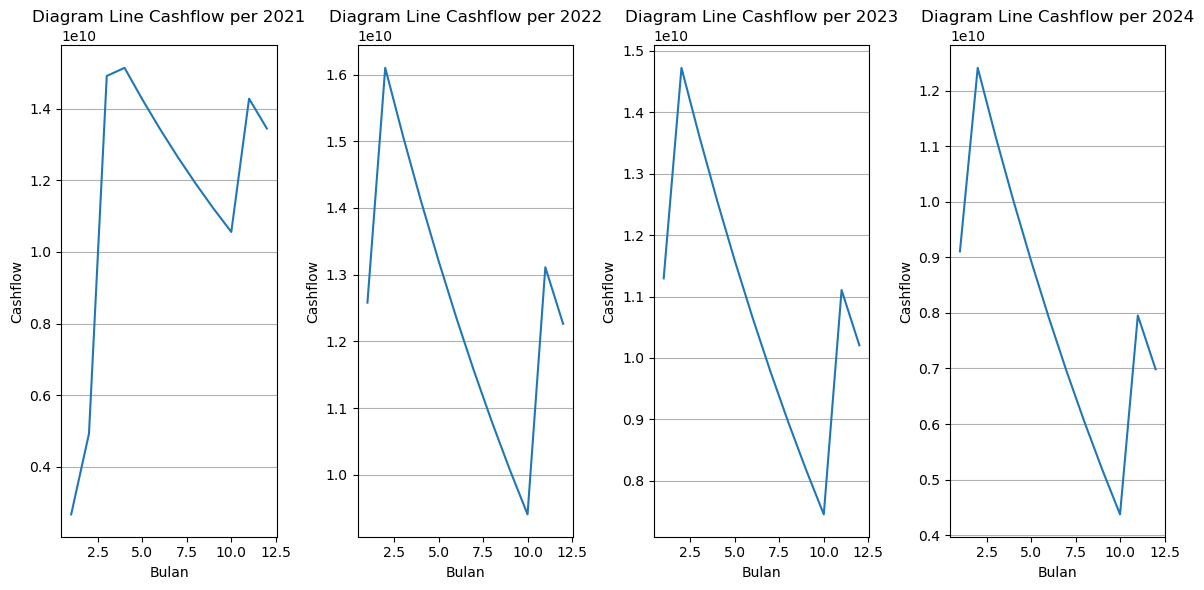

In [464]:
plt.figure(figsize=(12, 6))  # Ukuran gambar secara horizontal
plt.subplot(1, 4, 1)
plt.plot(dfeachYear[0].bulan,dfeachYear[0].cashflow)
plt.xlabel('Bulan')
plt.ylabel('Cashflow')
plt.title('Diagram Line Cashflow per 2021')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(1, 4, 2)
plt.plot(dfeachYear[1].bulan,dfeachYear[1].cashflow)
plt.xlabel('Bulan')
plt.ylabel('Cashflow')
plt.title('Diagram Line Cashflow per 2022')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(1, 4, 3)
plt.plot(dfeachYear[2].bulan,dfeachYear[2].cashflow)
plt.xlabel('Bulan')
plt.ylabel('Cashflow')
plt.title('Diagram Line Cashflow per 2023')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(1, 4, 4)
plt.plot(dfeachYear[3].bulan,dfeachYear[3].cashflow)
plt.xlabel('Bulan')
plt.ylabel('Cashflow')
plt.title('Diagram Line Cashflow per 2024')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [465]:
for i in prodi:
    print(i.kodeProdi,end='\n')
    for x in i.kelas:
        print(f"{x.nama_kelas} : {[i.id for i in x.mahasiswa]}")
    print("")

IF
IF-21-1 : [6, 8, 11, 17, 20, 24, 25, 28, 30, 45, 46, 49, 54, 55, 60, 61, 70, 78, 80, 88, 89, 95, 97, 105, 106, 108, 111, 119, 121, 123, 6, 8, 11, 17, 20, 24, 25, 28, 30, 45, 46, 49, 54, 55, 60, 61, 70, 78, 80, 88, 89, 95, 97, 105, 106, 108, 111, 119, 121, 123, 6, 8, 11, 17, 20, 24, 25, 28, 30, 45, 46, 49, 54, 55, 60, 61, 70, 78, 80, 88, 89, 95, 97, 105, 106, 108, 111, 119, 121, 123, 6, 8, 11, 17, 20, 24, 25, 28, 30, 45, 46, 49, 54, 55, 60, 61, 70, 78, 80, 88, 89, 95, 97, 105, 106, 108, 111, 119, 121, 123]
IF-21-2 : [6, 8, 11, 17, 20, 24, 25, 28, 30, 45, 46, 49, 54, 55, 60, 61, 70, 78, 80, 88, 89, 95, 97, 105, 106, 108, 111, 119, 121, 123, 6, 8, 11, 17, 20, 24, 25, 28, 30, 45, 46, 49, 54, 55, 60, 61, 70, 78, 80, 88, 89, 95, 97, 105, 106, 108, 111, 119, 121, 123, 6, 8, 11, 17, 20, 24, 25, 28, 30, 45, 46, 49, 54, 55, 60, 61, 70, 78, 80, 88, 89, 95, 97, 105, 106, 108, 111, 119, 121, 123, 6, 8, 11, 17, 20, 24, 25, 28, 30, 45, 46, 49, 54, 55, 60, 61, 70, 78, 80, 88, 89, 95, 97, 105, 106, 